### Number Recognition 

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

### Loading the dataset and preprocessing 

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

### Model creation

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 image to a 1D array
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer with ReLU activation
    keras.layers.Dropout(0.2),  # Dropout layer to reduce overfitting
    keras.layers.Dense(10)  # Output layer with 10 units for digits 0-9
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
# Train the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2919 - accuracy: 0.9153
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1423 - accuracy: 0.9587
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1080 - accuracy: 0.9667
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0880 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0724 - accuracy: 0.9767


In [8]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

313/313 - 2s - loss: 0.0706 - accuracy: 0.9787 - 2s/epoch - 5ms/step

Test accuracy: 0.9786999821662903


In [9]:
# Make predictions
predictions = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [10]:
import numpy as np

# Use argmax to find the predicted digit for each test sample
predicted_labels = np.argmax(predictions, axis=1)

In [12]:
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
confusion = confusion_matrix(y_test, predicted_labels)
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[ 971    0    0    1    1    0    2    1    4    0]
 [   0 1124    3    1    0    0    2    2    3    0]
 [   2    1 1004    3    1    1    2    5   13    0]
 [   1    0    1  989    0    3    0    4    8    4]
 [   2    0    4    1  958    0    3    2    4    8]
 [   2    0    0    9    1  867    1    1    8    3]
 [   5    2    1    1    3    4  937    0    5    0]
 [   2    6    7    5    0    0    0 1000    4    4]
 [   3    0    2    1    3    1    2    2  958    2]
 [   2    4    0    7    8    3    1    3    2  979]]


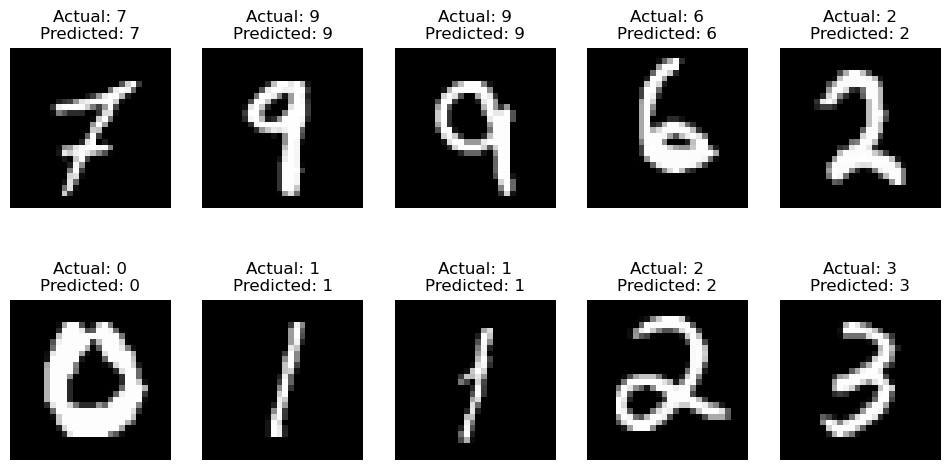

In [13]:
import matplotlib.pyplot as plt

# Choose a few random test samples to visualize
num_samples = 10
sample_indices = np.random.choice(len(x_test), num_samples)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(sample_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Actual: {y_test[idx]}\nPredicted: {predicted_labels[idx]}")
    plt.axis('off')

plt.show()
